<a href="https://colab.research.google.com/github/Saad7912/Dog-vs-Cats-Classification-using-Trasnfer-Learning/blob/main/Dgos_vs_Cats_Classification_using_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# installing the Kaggle library
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
#Downloading the data from Kaggle using kaggle API
!kaggle competitions download -c dogs-vs-cats


 99% 801M/812M [00:06<00:00, 110MB/s]
100% 812M/812M [00:06<00:00, 133MB/s]


In [4]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [5]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'
# r means we are reading this data set file
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [8]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.5370.jpg', 'dog.5396.jpg', 'dog.3634.jpg', 'dog.2169.jpg', 'dog.4607.jpg', 'cat.12371.jpg', 'cat.10215.jpg', 'cat.7167.jpg', 'cat.6314.jpg', 'dog.1530.jpg', 'dog.9959.jpg', 'cat.7381.jpg', 'cat.9559.jpg', 'cat.10127.jpg', 'cat.7224.jpg', 'dog.6874.jpg', 'dog.10117.jpg', 'cat.11137.jpg', 'cat.7488.jpg', 'dog.3737.jpg', 'cat.2939.jpg', 'cat.11532.jpg', 'cat.2462.jpg', 'dog.8727.jpg', 'cat.1208.jpg', 'dog.4669.jpg', 'dog.1498.jpg', 'cat.2779.jpg', 'cat.11757.jpg', 'dog.9449.jpg', 'dog.5921.jpg', 'cat.48.jpg', 'cat.6114.jpg', 'dog.11241.jpg', 'cat.5344.jpg', 'dog.4424.jpg', 'cat.7249.jpg', 'cat.9250.jpg', 'cat.5977.jpg', 'dog.12073.jpg', 'cat.8953.jpg', 'cat.222.jpg', 'dog.5479.jpg', 'cat.756.jpg', 'dog.11555.jpg', 'cat.2153.jpg', 'dog.1190.jpg', 'dog.1710.jpg', 'cat.5513.jpg', 'cat.5564.jpg', 'dog.8845.jpg', 'dog.5153.jpg', 'dog.2469.jpg', 'cat.99.jpg', 'cat.6301.jpg', 'dog.9885.jpg', 'dog.3398.jpg', 'cat.2518.jpg', 'dog.5911.jpg', 'cat.3193.jpg', 'dog.10332.jpg', 'dog.2992.jpg', 'd

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

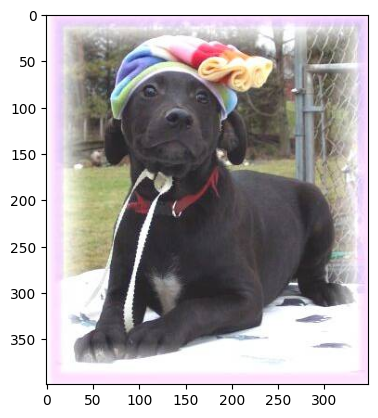

In [10]:
#display the image
img=mpimg.imread('/content/train/dog.138.jpg')
plt.imshow(img)

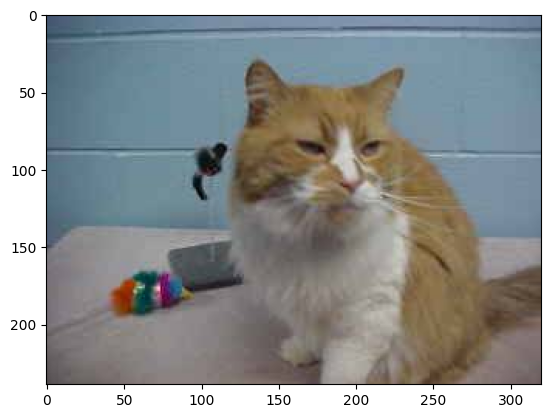

In [11]:
#display the image
img=mpimg.imread('/content/train/cat.11730.jpg')
plt.imshow(img)

In [12]:
# count the no of cats and dogs images
file_name=os.listdir('/content/train')

dog_count=0
cat_count=0

for img_file in file_name:
  name=img_file[0:3]

  if name=='dog':
    dog_count += 1
  else:
    cat_count += 1
print('The number of dogs', dog_count)
print('The number of cats', cat_count)


The number of dogs 12500
The number of cats 12500


In [13]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [14]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

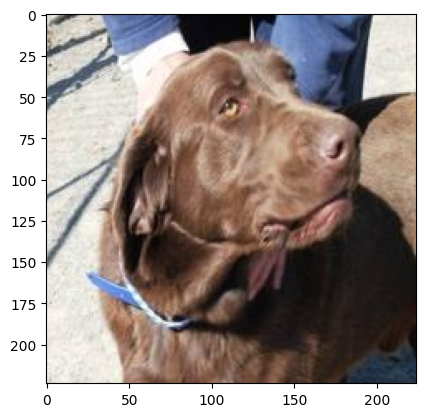

In [15]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.2169.jpg')
imgplt = plt.imshow(img)
plt.show()

In [16]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [17]:
print(filenames[0:5])
print(len(filenames))

['cat.5370.jpg', 'dog.5396.jpg', 'dog.3634.jpg', 'dog.2169.jpg', 'dog.4607.jpg']
2000


In [18]:
print(labels[0:5])
print(len(labels))

[0, 1, 1, 1, 1]
2000


In [19]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1018  982]


In [20]:
import cv2
import glob

In [21]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [22]:
print(dog_cat_images)

[[[[254 254 254]
   [254 254 254]
   [254 254 254]
   ...
   [130 144 167]
   [118 130 154]
   [111 123 147]]

  [[254 254 254]
   [254 254 254]
   [254 254 254]
   ...
   [108 122 145]
   [ 99 112 138]
   [ 94 108 131]]

  [[254 254 254]
   [254 254 254]
   [254 254 254]
   ...
   [ 90 105 131]
   [ 87 101 129]
   [ 85 100 126]]

  ...

  [[145 163 170]
   [148 166 173]
   [150 168 175]
   ...
   [ 63  87 115]
   [ 59  83 111]
   [ 54  78 106]]

  [[144 162 169]
   [145 163 170]
   [145 163 170]
   ...
   [ 59  83 111]
   [ 59  83 111]
   [ 55  79 107]]

  [[141 159 166]
   [139 157 164]
   [137 155 162]
   ...
   [ 64  88 116]
   [ 66  90 118]
   [ 64  88 116]]]


 [[[ 18   0 129]
   [ 17   0 128]
   [ 19   0 127]
   ...
   [104 117 131]
   [103 116 130]
   [102 115 129]]

  [[ 20   2 133]
   [ 20   2 133]
   [ 22   1 133]
   ...
   [104 117 131]
   [103 116 130]
   [102 115 129]]

  [[ 26   3 141]
   [ 26   3 141]
   [ 25   2 140]
   ...
   [108 119 133]
   [106 117 131]
   [104 115

In [23]:
type(dog_cat_images)

numpy.ndarray

In [24]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [25]:
X = dog_cat_images
Y = np.asarray(labels)

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [28]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [29]:
print(X_train_scaled)

[[[[0.69019608 0.75686275 0.94901961]
   [0.67843137 0.75294118 0.92941176]
   [0.63529412 0.70588235 0.86666667]
   ...
   [0.16862745 0.40392157 0.4       ]
   [0.11372549 0.38823529 0.38823529]
   [0.05098039 0.34117647 0.34117647]]

  [[0.70196078 0.76862745 0.96078431]
   [0.67843137 0.75294118 0.92941176]
   [0.64313725 0.71764706 0.86666667]
   ...
   [0.19215686 0.42745098 0.42352941]
   [0.14509804 0.40784314 0.41176471]
   [0.09019608 0.38039216 0.38039216]]

  [[0.70588235 0.78431373 0.96862745]
   [0.67843137 0.75294118 0.92941176]
   [0.65098039 0.7254902  0.87058824]
   ...
   [0.2        0.42745098 0.42352941]
   [0.14901961 0.40392157 0.40784314]
   [0.11372549 0.39607843 0.39607843]]

  ...

  [[0.99607843 0.99607843 0.99607843]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1. 

In [30]:
import tensorflow as tf
import tensorflow_hub as hub

In [35]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [36]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [37]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [38]:
model.fit(X_train_scaled, Y_train, epochs=3)

Epoch 1/3
50/50 [==============================] - 78s 1s/step - loss: 0.1951 - acc: 0.9156
Epoch 2/3
50/50 [==============================] - 74s 1s/step - loss: 0.0733 - acc: 0.9719
Epoch 3/3
50/50 [==============================] - 72s 1s/step - loss: 0.0560 - acc: 0.9831


In [39]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 28s 2s/step - loss: 0.0688 - acc: 0.9800
Test Loss = 0.06877844780683517
Test Accuracy = 0.9800000190734863


Path of the image to be predicted: /content/dog2.jpg


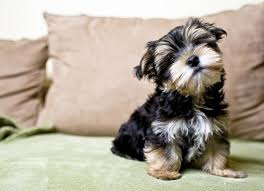

1/1 [==============================] - 0s 91ms/step
[[-1.1162966   0.73239714]]
1
The image represents a Dog


In [44]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')